## Web Scraping of IMDB Bollywood Movies Data

In [102]:
#importing the libraries needed 
import pandas as pd
import requests
import csv # to cretae csv file
import numpy as np
from bs4 import BeautifulSoup  
from time import sleep
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.25)
import itertools


In [39]:
#Declaring the headers 
headers = {"Accept-Language": "en-US,en;q=0.5"}

In [52]:
#creating an array of values and passing it in the url for dynamic webpages
pages = np.arange(1,1000,50)

In [54]:
movies_details=[]  # a list to store movies details
description=[]
#the whole core of the script
for URL in pages:
    URL = requests.get("https://www.imdb.com/search/title/?title_type=feature&primary_language=hi&sort=num_votes,desc&start="+str(URL)+"&ref_=adv_nxt")

    soup = BeautifulSoup(URL.text,'html.parser')

    movies_data=soup.findAll('div',attrs = {'class':'lister-item mode-advanced'})
    sleep(randint(2,8))   
    
    for row in movies_data:
        movies={}
        movies['title'] = row.h3.a.text
        movies['Year_of_release'] =row.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        movies['Genre'] = row.p.find('span',class_='genre').text.replace('\n',' ')
        movies['movie_runtime']=row.p.find("span",class_='runtime').text
        movies['IMDB_rating']=row.find('div',class_='inline-block ratings-imdb-rating').text.replace('\n',' ')
        movies['IMDB_votes']=row.find('span',text='Votes:').find_next('span')['data-value']
        movies['Cast_&_Crew']=row.find('p', class_ = '').text.replace('\n', ' ')
        
        '''
        describe = row.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        description.append(description_)
        '''
        
        movies_details.append(movies)
    
filename = 'Movies_Details.csv'
with open(filename, 'w', newline='') as f:
    w = csv.DictWriter(f,['title','Year_of_release','Genre','movie_runtime','IMDB_rating','IMDB_votes','Cast_&_Crew'])
    w.writeheader()
    for movies in movies_details:
        w.writerow(movies)
   

In [ ]:
'''
https://www.imdb.com/search/title/?title_type=feature&primary_language=hi&sort=num_votes,desc

https://www.imdb.com/search/title/?title_type=feature&primary_language=hi&sort=num_votes,desc&start=51&ref_=adv_nxt
    
https://www.imdb.com/search/title/?title_type=feature&primary_language=hi&sort=num_votes,desc&start=101&ref_=adv_nxt

'''

* * *

#  Additional Data Processing and exploratory data analysis .

In [56]:
df=pd.read_csv('Movies_Details.csv')
df.head()

,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew
0,3 Idiots,2009,"Comedy, Drama",170 min,8.4,364393,Director: Rajkumar Hirani | Stars: A...
1,Taare Zameen Par,2007,"Drama, Family",165 min,8.4,179112,"Directors: Aamir Khan, Amole Gupte | ..."
2,PK,2014,"Comedy, Drama, Musical",153 min,8.1,171076,Director: Rajkumar Hirani | Stars: A...
3,Radhe,2021,"Action, Crime, Thriller",135 min,1.8,169883,Director: Prabhu Deva | Stars: Salma...
4,Dangal,2016,"Action, Biography, Drama",161 min,8.4,169158,Director: Nitesh Tiwari | Stars: Aam...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1000 non-null   object 
 1   Year_of_release  1000 non-null   object 
 2   Genre            1000 non-null   object 
 3   movie_runtime    1000 non-null   object 
 4   IMDB_rating      1000 non-null   float64
 5   IMDB_votes       1000 non-null   int64  
 6   Cast_&_Crew      1000 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [60]:
#changing data type of year_of_release from string to int
df['Year_of_release']=pd.to_numeric(df['Year_of_release'],errors='coerce').fillna(0).astype(int)

In [61]:
# finding Age of content(movie) - time since release of the content
current_year=2021

df['Age_of_Movie']=current_year-df['Year_of_release']


In [62]:
df.head(10)

,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew,Age_of_Movie
0,3 Idiots,2009,"Comedy, Drama",170 min,8.4,364393,Director: Rajkumar Hirani | Stars: A...,12
1,Taare Zameen Par,2007,"Drama, Family",165 min,8.4,179112,"Directors: Aamir Khan, Amole Gupte | ...",14
2,PK,2014,"Comedy, Drama, Musical",153 min,8.1,171076,Director: Rajkumar Hirani | Stars: A...,7
3,Radhe,2021,"Action, Crime, Thriller",135 min,1.8,169883,Director: Prabhu Deva | Stars: Salma...,0
4,Dangal,2016,"Action, Biography, Drama",161 min,8.4,169158,Director: Nitesh Tiwari | Stars: Aam...,5
5,Dil Bechara,2020,"Comedy, Drama, Romance",101 min,8.1,122344,Director: Mukesh Chhabra | Stars: Su...,1
6,Rang De Basanti,2006,"Comedy, Crime, Drama",167 min,8.1,115948,Director: Rakeysh Omprakash Mehra | ...,15
7,Lagaan: Once Upon a Time in India,2001,"Drama, Musical, Sport",224 min,8.1,108760,Director: Ashutosh Gowariker | Stars...,20
8,My Name Is Khan,2010,Drama,165 min,8.0,102158,Director: Karan Johar | Stars: Shah ...,11
9,Sadak 2,2020,"Action, Drama",133 min,1.1,88873,Director: Mahesh Bhatt | Stars: Alia...,1


In [88]:
#finding popular movies by IMDB rating
print("Popular movies(by IMDB rating) : ")

popula_movies_ratingwise= df[df['IMDB_rating'] == df['IMDB_rating'].max()]
popula_movies_ratingwise


Popular movies(by IMDB rating) : 


,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew,Age_of_Movie
50,Shershaah,2021,"Action, Biography, Drama",135 min,8.8,46661,Director: Vishnuvardhan | Stars: Sid...,0


In [87]:
#finding popular movies by IMDB votes
print("Popular movies(by IMDB votes) : ")
popula_movies_votewise= df[df['IMDB_votes'] == df['IMDB_votes'].max()]
popula_movies_votewise

Popular movies(by IMDB votes) : 


,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew,Age_of_Movie
0,3 Idiots,2009,"Comedy, Drama",170 min,8.4,364393,Director: Rajkumar Hirani | Stars: A...,12


In [90]:
#popular movie by both IMDB rating and IMDB votes
popular_movies=df[(df['IMDB_rating'] == df['IMDB_rating'].max()) | (df['IMDB_votes'] == df['IMDB_votes'].max())]
popular_movies

,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew,Age_of_Movie
0,3 Idiots,2009,"Comedy, Drama",170 min,8.4,364393,Director: Rajkumar Hirani | Stars: A...,12
50,Shershaah,2021,"Action, Biography, Drama",135 min,8.8,46661,Director: Vishnuvardhan | Stars: Sid...,0


# observation:-
* 1. 3 Idiots is popular movies having maximum IMDB votes so the cast and crew is also popular.
* 2. Shershaah is  a popular movie having maximum IMDB rating so that the cast and crew is also popular.

Text(0.5, 1.0, 'Movie Count by Year')

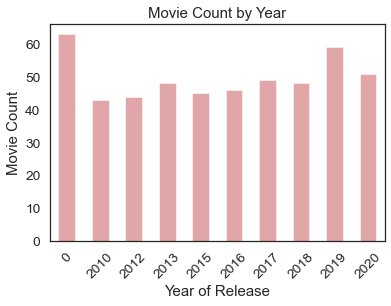

In [99]:
#Graphical representation of  the amount of movies that were produced in top 10 year
movie_yearly_count = df['Year_of_release'].value_counts().head(10).sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=45)
movie_yearly_count.set_xlabel('Year of Release')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

In [100]:
 #Determine the amount of movies that were produced in top 10 year
df['Year_of_release'].value_counts().head(10)

0       63
2019    59
2020    51
2017    49
2018    48
2013    48
2016    46
2015    45
2012    44
2010    43
Name: Year_of_release, dtype: int64

In [103]:
#Since most of these films in the data set are part of multiple genres, we need to get a list
#of entirely unique genres, without repeats, to see how many genres we are truly dealing with

unique_genres = df['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{' Action',
 ' Adventure',
 ' Adventure            ',
 ' Biography',
 ' Comedy',
 ' Comedy            ',
 ' Crime',
 ' Crime            ',
 ' Drama',
 ' Drama            ',
 ' Family',
 ' Family            ',
 ' Fantasy',
 ' Fantasy            ',
 ' History',
 ' History            ',
 ' Horror',
 ' Horror            ',
 ' Music',
 ' Music            ',
 ' Musical',
 ' Musical            ',
 ' Mystery',
 ' Mystery            ',
 ' Romance',
 ' Romance            ',
 ' Sci-Fi',
 ' Sci-Fi            ',
 ' Sport            ',
 ' Thriller',
 ' Thriller            ',
 ' War            '}

Number of movies in each genre: 

 War             8
 Crime 242
 Music             15
 Family 35
 History             17
 Biography 40
 History 22
 Romance 281
 Romance             267
 Drama             304
 Crime             44
 Adventure 57
 Mystery 63
 Family             25
 Drama 730
 Action 371
 Mystery             41
 Sport             23
 Fantasy             13
 Adventure             2
 Horror 28


<ipython-input-106-beabc0b1fe0e>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


 Comedy 424
 Musical 76
 Comedy             49
 Sci-Fi 9
 Fantasy 21
 Music 94
 Horror             10
 Sci-Fi             8
 Musical             44
 Thriller             130
 Thriller 132


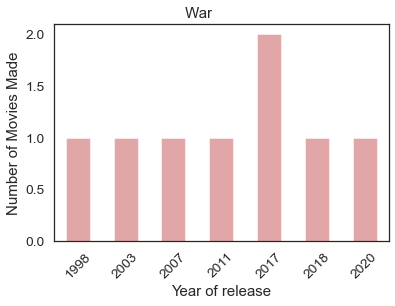

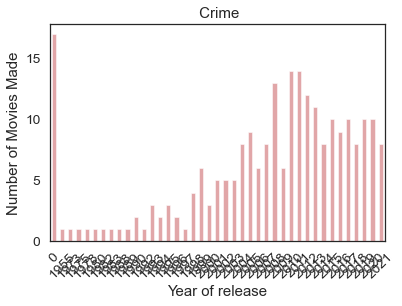

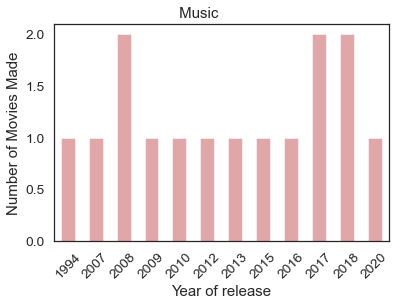

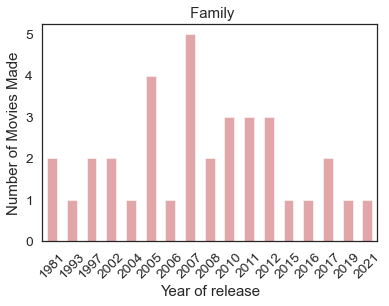

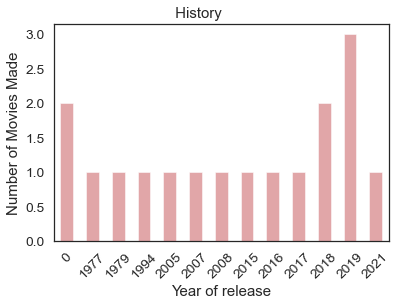

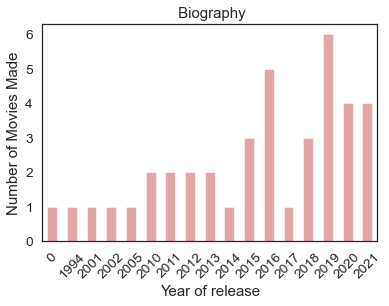

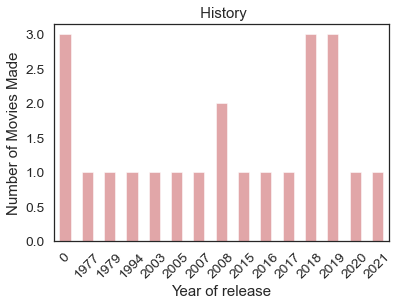

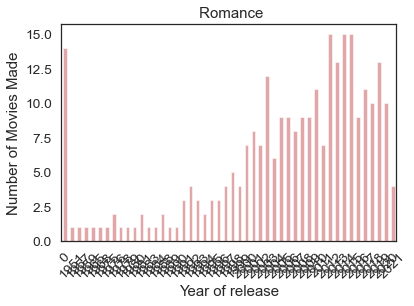

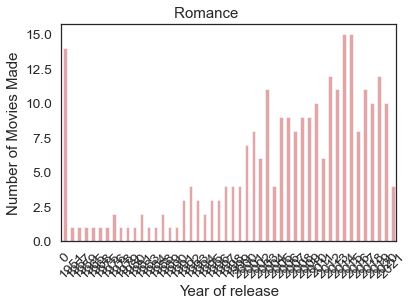

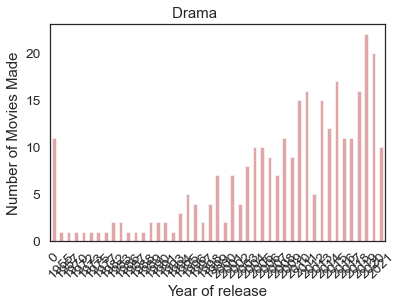

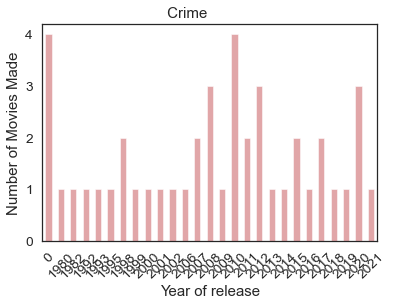

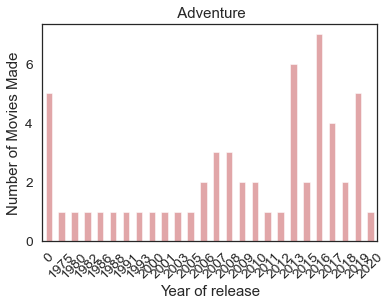

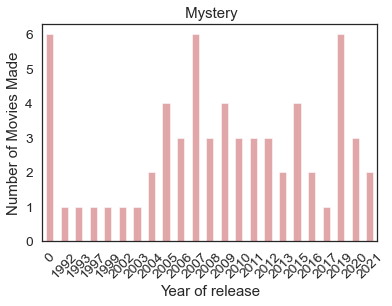

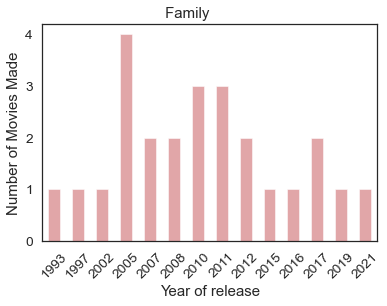

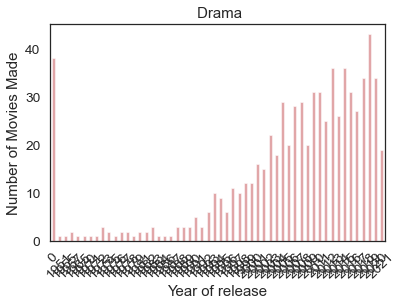

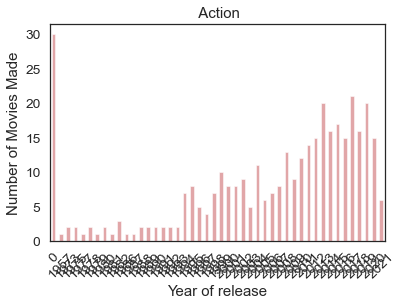

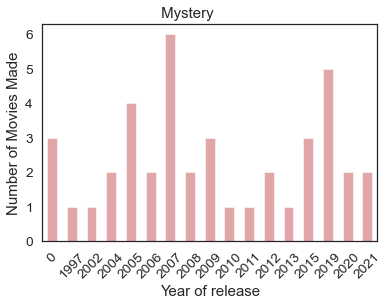

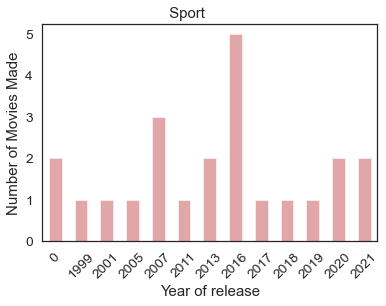

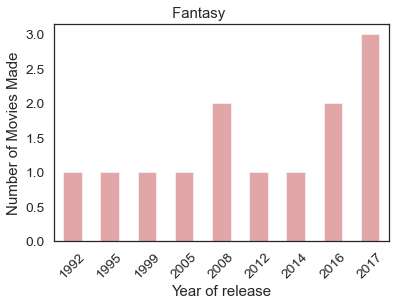

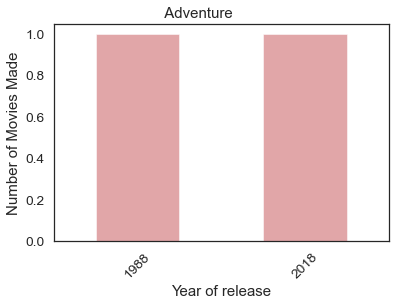

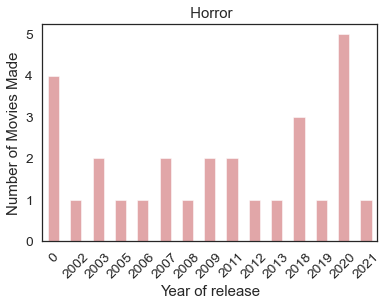

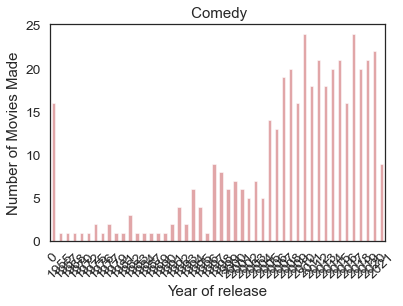

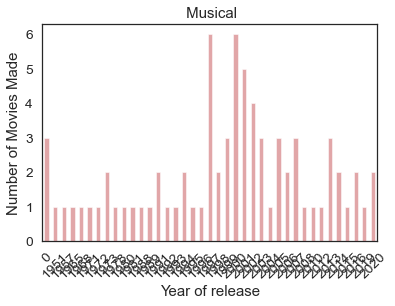

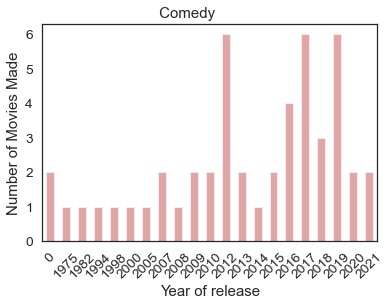

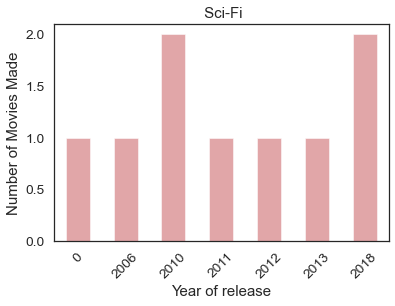

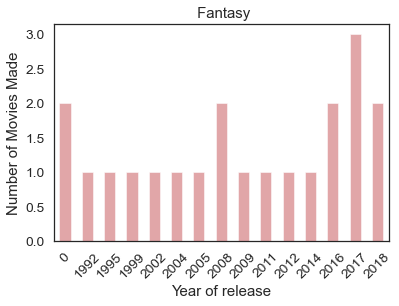

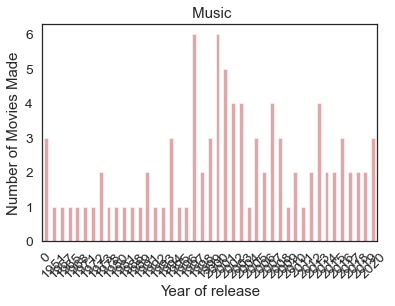

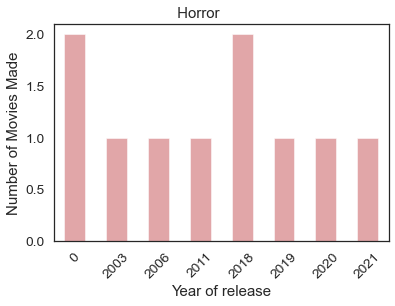

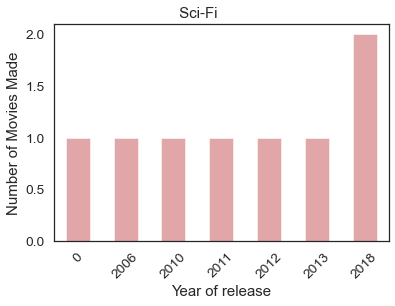

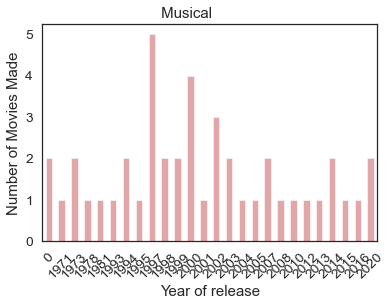

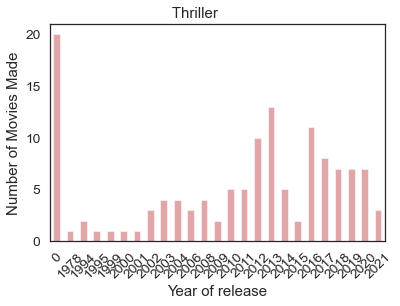

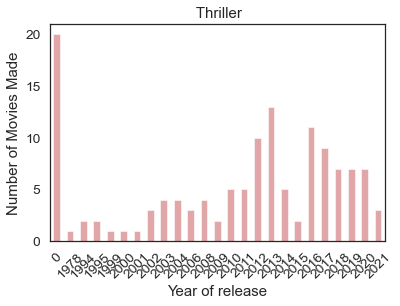

In [106]:
#Now we can iterate through each genre, counting the number of films that contain that genre
#then plot how many films of each genre were made by year onto a bar graph

print('Number of movies in each genre: \n')

for genre in individual_genres:
    current_genre = df['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year of release')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    df[current_genre].Year_of_release.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(df[current_genre]))

In [107]:
#Determine the percent of total entries are attributed to each genre. Keep in mind that 
#since some films have multiple genres, these percentages won't add to 100%

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = df['Genre'].str.contains(genre).fillna(False)
    pct = len(df[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

 War             0.8
 Crime 24.2
 Music             1.5
 Family 3.5000000000000004
 History             1.7000000000000002
 Biography 4.0
 History 2.1999999999999997
 Romance 28.1
 Romance             26.700000000000003
 Drama             30.4
 Crime             4.3999999999999995
 Adventure 5.7
 Mystery 6.3
 Family             2.5
 Drama 73.0
 Action 37.1
 Mystery             4.1000000000000005
 Sport             2.3
 Fantasy             1.3
 Adventure             0.2
 Horror 2.8000000000000003
 Comedy 42.4
 Musical 7.6
 Comedy             4.9
 Sci-Fi 0.8999999999999999
 Fantasy 2.1
 Music 9.4
 Horror             1.0
 Sci-Fi             0.8
 Musical             4.3999999999999995
 Thriller             13.0
 Thriller 13.200000000000001


In [108]:
#Throw our genre percentage values into a DF for easy plotting

genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
War,0.8
Crime,24.2
Music,1.5
Family,3.5
History,1.7
Biography,4.0
History,2.2
Romance,28.1
Romance,26.7
Drama,30.4


Text(0.5, 1.0, 'Percent of Total Movies Made from Top 5 Genres')

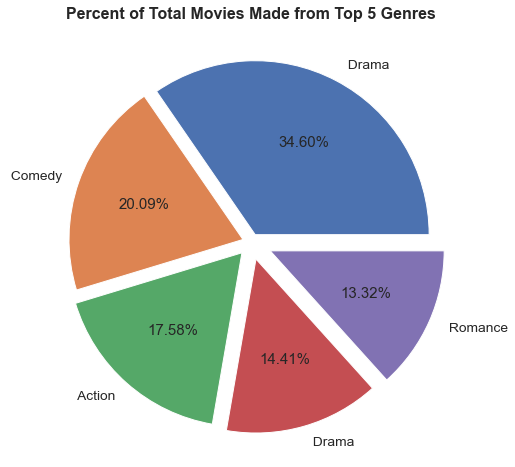

In [111]:
#Taking a sum of the total movies made from the top 5 genres,
#which contributed to the most in terms of movies made?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8),  explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

In [120]:
# Spliting cast and crew colum into director and actors

In [119]:

df[['Director','Actors']] = df['Cast_&_Crew'].str.split("|",expand=True,)
df

,title,Year_of_release,Genre,movie_runtime,IMDB_rating,IMDB_votes,Cast_&_Crew,Age_of_Movie,Director,Actors
0,3 Idiots,2009,"Comedy, Drama",170 min,8.4,364393,Director: Rajkumar Hirani | Stars: A...,12,Director: Rajkumar Hirani,"Stars: Aamir Khan, Madhavan, Mona Sing..."
1,Taare Zameen Par,2007,"Drama, Family",165 min,8.4,179112,"Directors: Aamir Khan, Amole Gupte | ...",14,"Directors: Aamir Khan, Amole Gupte","Stars: Darsheel Safary, Aamir Khan, Ti..."
2,PK,2014,"Comedy, Drama, Musical",153 min,8.1,171076,Director: Rajkumar Hirani | Stars: A...,7,Director: Rajkumar Hirani,"Stars: Aamir Khan, Anushka Sharma, San..."
3,Radhe,2021,"Action, Crime, Thriller",135 min,1.8,169883,Director: Prabhu Deva | Stars: Salma...,0,Director: Prabhu Deva,"Stars: Salman Khan, Disha Patani, Rand..."
4,Dangal,2016,"Action, Biography, Drama",161 min,8.4,169158,Director: Nitesh Tiwari | Stars: Aam...,5,Director: Nitesh Tiwari,"Stars: Aamir Khan, Sakshi Tanwar, Fati..."
...,...,...,...,...,...,...,...,...,...,...
995,Gurgaon,2016,"Crime, Thriller",107 min,6.5,1957,Director: Shanker Raman | Stars: Aks...,5,Director: Shanker Raman,"Stars: Akshay Oberoi, Pankaj Tripathi, ..."
996,Genius,0,"Action, Thriller",165 min,5.4,1955,Director: Anil Sharma | Stars: Utkar...,2021,Director: Anil Sharma,"Stars: Utkarsh Sharma, Ishita Chauhan, ..."
997,Sarkar 3,2017,"Action, Crime, Drama",130 min,4.9,1955,Director: Ram Gopal Varma | Stars: A...,4,Director: Ram Gopal Varma,"Stars: Amitabh Bachchan, Manoj Bajpayee..."
998,Albert Pinto Ko Gussa Kyun Aata Hai?,2019,Drama,100 min,5.5,1951,Director: Soumitra Ranade | Stars: M...,2,Director: Soumitra Ranade,"Stars: Manav Kaul, Nandita Das, Amarje..."


In [121]:
#Find the most active directors, 'most active' being defined as number of films with their name on it
most_active_director= df['Director'].value_counts().head(10)
most_active_director

     Director: David Dhawan                                              22
     Director: Priyadarshan                                              16
     Directors: Abbas Alibhai Burmawalla,  Mastan Alibhai Burmawalla     14
     Director: Ram Gopal Varma                                           13
     Director: Anurag Kashyap                                            13
     Director: Rohit Shetty                                              12
     Director: Anees Bazmee                                              11
     Director: Rajkumar Santoshi                                         11
     Director: Mohit Suri                                                11
     Director: Indra Kumar                                               10
Name: Director, dtype: int64

Text(0.5, 1.0, 'Top 10 most active directors: ')

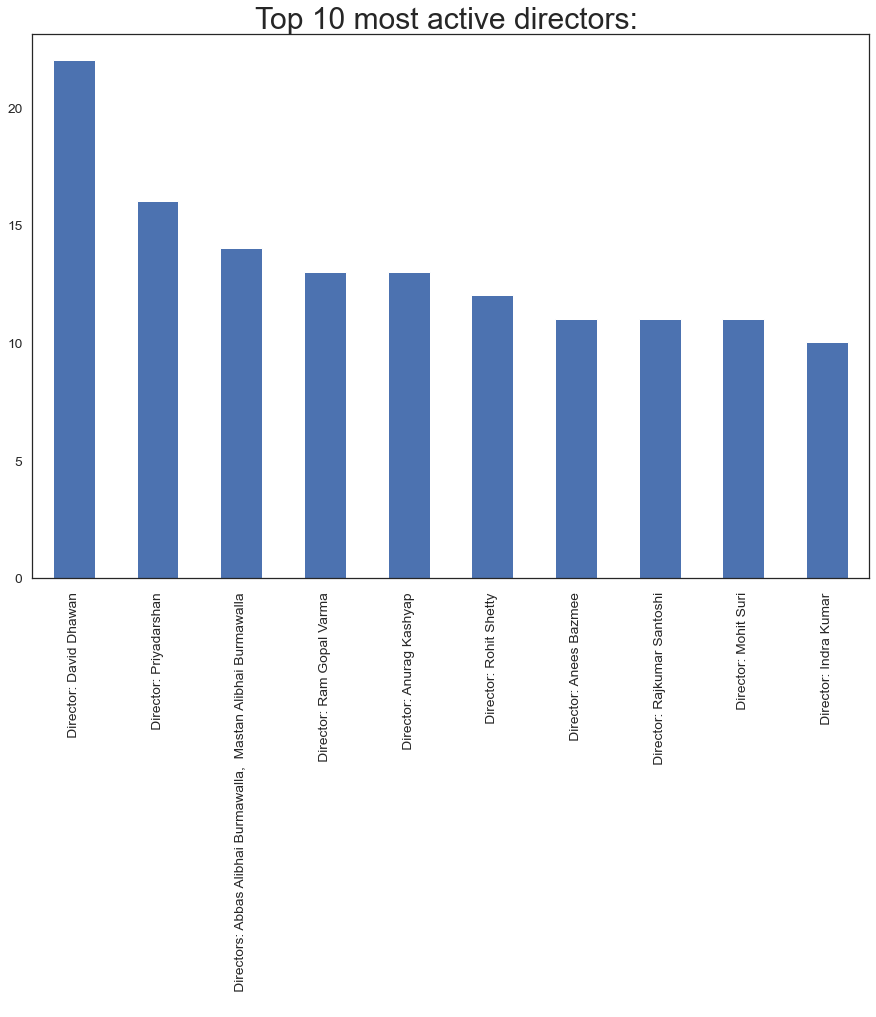

In [123]:
# Graphically representation top 10 most active directors
plt.figure(figsize=(15,10))
most_active_director.plot.bar()
plt.title("Top 10 most active directors: ",fontsize=30)

In [124]:
#Find the most active directors, 'most active' being defined as number of films with their name on it
most_active_actors= df['Actors'].value_counts().head(10)
most_active_actors

      Stars: Sanjay Dutt,  Riteish Deshmukh,  Arshad Warsi,  Javed Jaffrey                2
      Stars: Salman Khan,  Mithun Chakraborty,  Jackie Shroff,  Zareen Khan               1
      Stars: Zaheer Iqbal,  Pranutan Bahl,  Mir Mohammed Mehroos,  Mir Mohammed Zayan     1
      Stars: Madhuri Dixit,  Naseeruddin Shah,  Arshad Warsi,  Huma Qureshi               1
      Stars: Kajal Aggarwal,  Pawan Kalyan,  Sharad Kelkar,  Raai Laxmi                   1
      Stars: Rahul Bose,  Mallika Sherawat,  Ranvir Shorey,  Sharat Saxena                1
      Stars: Kangana Ranaut,  Rimi Sen,  Atul Kulkarni,  Danny Denzongpa                  1
      Stars: Rajkummar Rao,  Kriti Kharbanda,  K.K. Raina,  Alka Amin                     1
      Stars: Sidharth Malhotra,  Kiara Advani,  Shiv Panditt,  Sahil Vaid                 1
      Stars: Sharman Joshi,  Amrita Arora,  Sohail Khan,  Isha Koppikar                   1
Name: Actors, dtype: int64

* * *

'''
Author @ Rashmi Deshmukh
'''